<a href="https://colab.research.google.com/github/Yayahajdar/spam-ham/blob/main/spamclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#Reading csv file
dr = pd.read_csv('https://raw.githubusercontent.com/remijul/dataset/master/SMSSpamCollection',
         sep='\t', header=None)
dr

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df = pd.read_csv('data.csv',
         sep=',', header=None)
df = df.drop(0, axis=1)
df = df.drop(0, axis=0)
df

,1,2
1,ham,Go until wrong point crazy Available only in b...
2,ham,of lar Joking if u on
3,spam,Free entry in 2 a wily come to win FA Cup fina...
4,ham,U dun say so early for U c already then say
5,ham,Nah I don't think he goes to us he lives aroun...
...,...,...
5568,spam,This is the and time we have tried 2 contact u...
5569,ham,Will i b going to esplanade for home
5570,ham,Pity was in mood for that sonny other suggestions
5571,ham,The guy did some bitching but I acted like id ...


In [4]:
#Rename the name of columns
df.rename(columns = {1:'sit',2:'correct'}, inplace = True)
df

,sit,correct
1,ham,Go until wrong point crazy Available only in b...
2,ham,of lar Joking if u on
3,spam,Free entry in 2 a wily come to win FA Cup fina...
4,ham,U dun say so early for U c already then say
5,ham,Nah I don't think he goes to us he lives aroun...
...,...,...
5568,spam,This is the and time we have tried 2 contact u...
5569,ham,Will i b going to esplanade for home
5570,ham,Pity was in mood for that sonny other suggestions
5571,ham,The guy did some bitching but I acted like id ...


In [5]:
#Rename the name of columns
df.rename(columns = {0:'sit',1:'correct'}, inplace = True)
df

,sit,correct
1,ham,Go until wrong point crazy Available only in b...
2,ham,of lar Joking if u on
3,spam,Free entry in 2 a wily come to win FA Cup fina...
4,ham,U dun say so early for U c already then say
5,ham,Nah I don't think he goes to us he lives aroun...
...,...,...
5568,spam,This is the and time we have tried 2 contact u...
5569,ham,Will i b going to esplanade for home
5570,ham,Pity was in mood for that sonny other suggestions
5571,ham,The guy did some bitching but I acted like id ...


In [6]:
#exploring the dataset
df['sit'].value_counts()

sit
ham     4825
spam     747
Name: count, dtype: int64

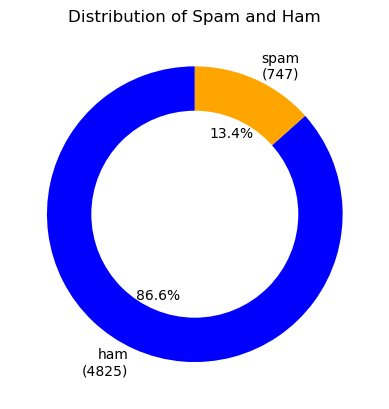

In [7]:

labels = ['ham', 'spam']
counts = [4825, 747]

# Calculate the percentage values
percentages = [count / sum(counts) * 100 for count in counts]

# Create a list of labels with both count and percentage
label_values = [f'{label}\n({count})' for label, count in zip(labels, counts)]

plt.pie(counts, labels=label_values, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)

# Draw a circle in the center of the pie to make it look like a donut chart (optional)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution of Spam and Ham")

plt.show()

In [8]:
#separate classes
df_ham = df[df.sit=='ham']
df_spam = df[df.sit=='spam']

#convert to list

ham_list=df_ham['correct'].tolist()
spam_list= df_spam['correct'].tolist()

#convert the list into a string
fil_spam = ("").join(spam_list)
fil_spam = fil_spam.lower()
#convert the list into a string
fil_ham = "".join(map(str, ham_list))
fil_ham = fil_ham.lower()


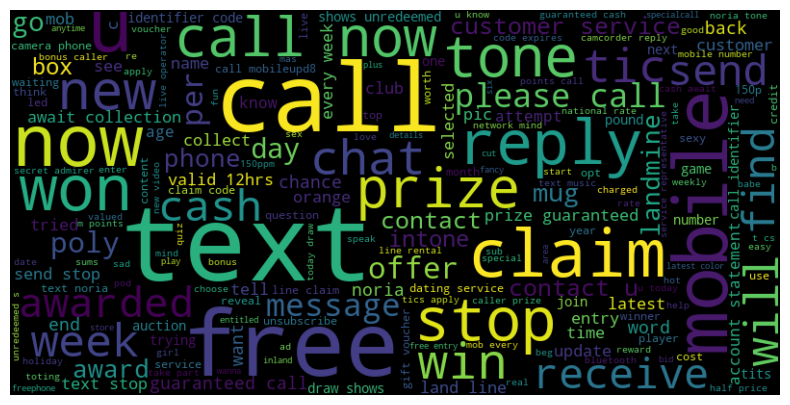

In [9]:


#  dataset as a string or a list of strings
text_data = fil_spam

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110,colormap='viridis').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
import os
from wordcloud import WordCloud
from PIL import Image
import numpy as np 

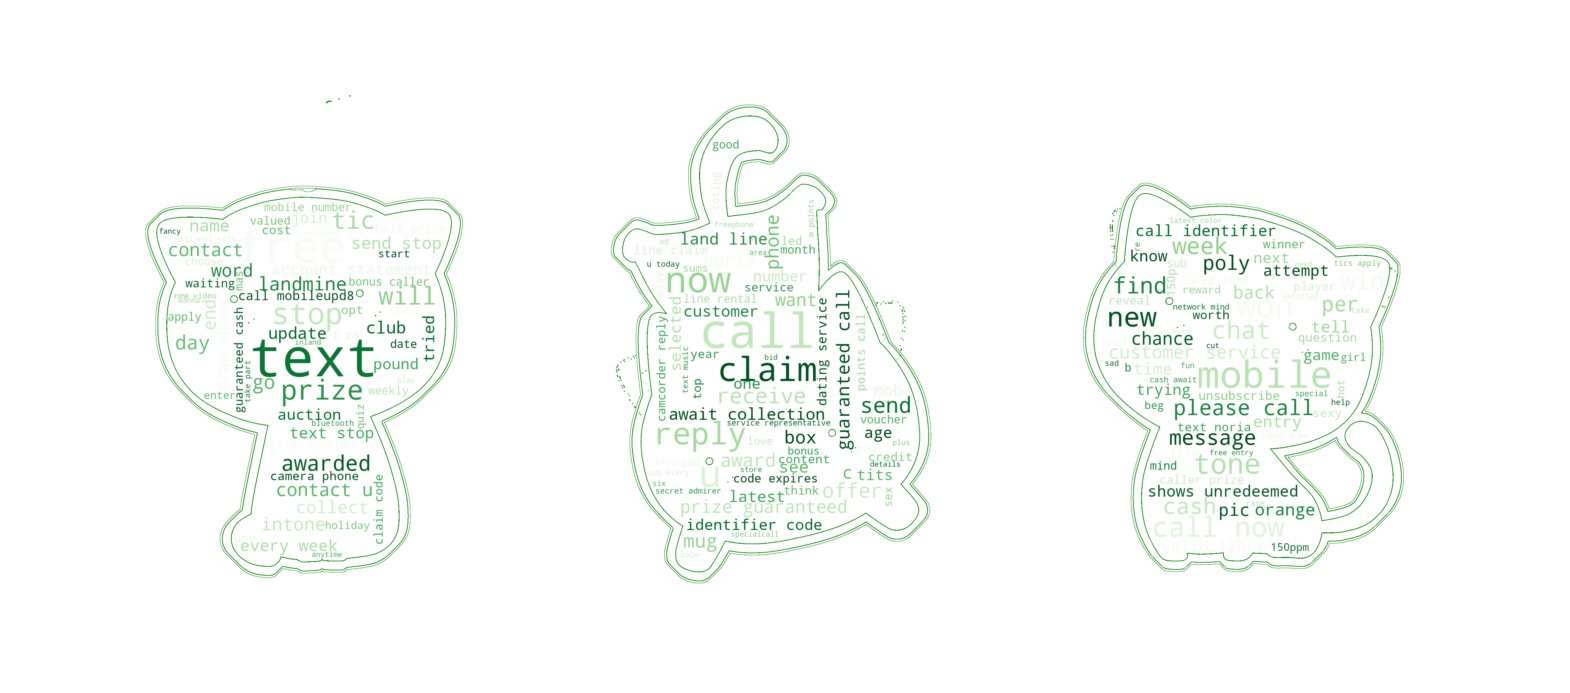

In [15]:

comment_mask = np.array(Image.open("image/cat.png"))
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", contour_color= 'green',contour_width= 1     ,   colormap="Greens").generate(text_data)
 
# Display the generated image

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.margins(x=0, y=0)

plt.show()

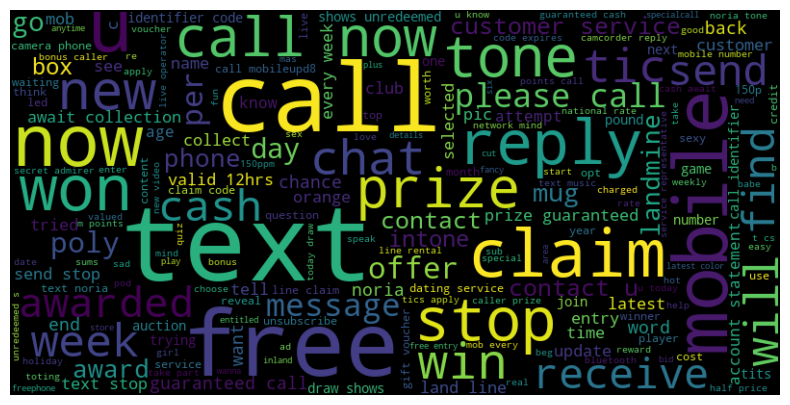

In [16]:

#   dataset  list of strings
text_data = fil_ham

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(fil_spam)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

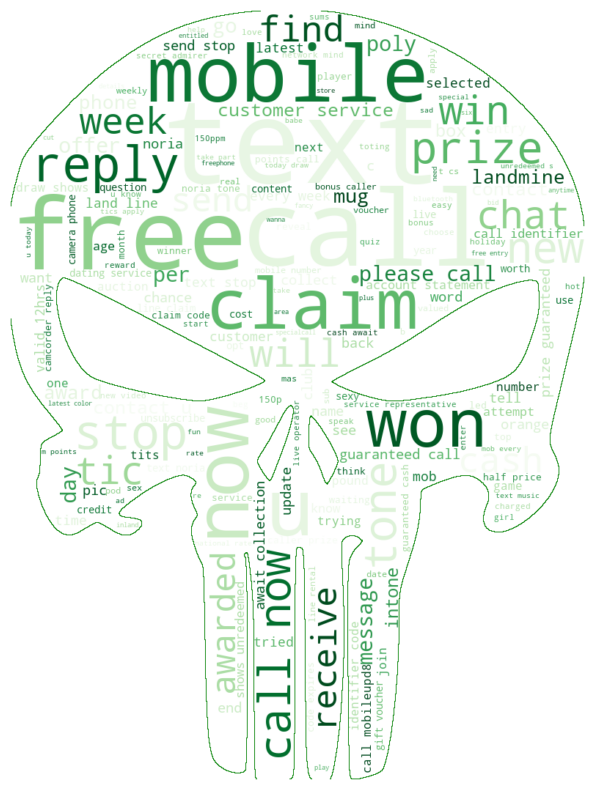

In [17]:
comment_mask = np.array(Image.open("image/bat.png"))
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", contour_color= 'green',contour_width= 1     ,   colormap="Greens").generate(fil_spam)
 
# Display the generated image

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.margins(x=0, y=0)

plt.show()

In [13]:
# replace ham by 0 AND spam BY 1 in sit column
df['sit'] = df['sit'].apply(lambda x: 1 if x == 'spam' else 0)
df

,sit,correct
1,0,Go until wrong point crazy Available only in b...
2,0,of lar Joking if u on
3,1,Free entry in 2 a wily come to win FA Cup fina...
4,0,U dun say so early for U c already then say
5,0,Nah I don't think he goes to us he lives aroun...
...,...,...
5568,1,This is the and time we have tried 2 contact u...
5569,0,Will i b going to esplanade for home
5570,0,Pity was in mood for that sonny other suggestions
5571,0,The guy did some bitching but I acted like id ...


In [ ]:
!pip install pyspellchecker
!pip install indexer
mess_lis= df['message'].tolist()
from spellchecker import SpellChecker
import string


def remove_punctuation(sentence):
    translator = str.maketrans("", "", string.punctuation)
    return sentence.translate(translator)

def correct_spelling_errors(sentences):
    spell = SpellChecker()

    corrected_sentences = []
    for sentence in sentences:
        cleaned_sentence = remove_punctuation(sentence)
        words = cleaned_sentence.split()
        corrected_words = [spell.correction(word) if spell.correction(word) is not None else word for word in words]
        corrected_sentence = ' '.join(corrected_words)

        corrected_sentences.append(corrected_sentence)

    return corrected_sentences

corrected_sentences = correct_spelling_errors(mess_lis)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 11.0 MB/s eta 0:00:00
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install indexermess_lis= df['message'].tolist()'


In [ ]:
corrected_sentences[:10]
df['correct']= corrected_sentences
df.head(10)



,sit,correct
1,0,Go until wrong point crazy Available only in b...
2,0,of lar Joking if u on
3,1,Free entry in 2 a wily come to win FA Cup fina...
4,0,U dun say so early for U c already then say
5,0,Nah I don't think he goes to us he lives aroun...
6,1,freeing Hey there darling its been 3 weeks now...
7,0,Even my brother is not like to speak with me T...
8,0,As per your request belle belle or Minnaminung...
9,1,WINNER As a valued network customer you have b...
10,1,Had your mobile 11 months or more U R entitled...


In [ ]:
dr[1]


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: 1, Length: 5572, dtype: object

In [ ]:
import textblob
mess =dr[1]
blob = textblob.TextBlob(str(mess))
corrected_text = blob.correct()
print(corrected_text)

0       To until during point, crazy.. Available only ...
1                           K war... Joking if u on...
2       Free entry in 2 a wily come to win of Up find...
3       U dun say so early for... U c already then say...
4       Ah I don't think he goes to us, he lives are...
                              ...                        
5567    His is the and time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    City, * was in mood for that. To...any other s...
5570    The guy did some itching but I acted like i'd...
5571                           Of. Its true to its name
Same: 1, Length: 5572, type: object


In [ ]:
df[['sit', 'correct']].to_csv('data.csv')


In [ ]:
type(corrected_sentences)

list

In [ ]:
mess_lis= df['message']
import string
import nltk
from textblob import Word
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('words')




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:

from nltk.tokenize import word_tokenize

def remove_punctuation(sentence):
    translator = str.maketrans("", "", string.punctuation)
    return sentence.translate(translator)

def correct_spelling_errors(sentences):
    corrected_sentences = []
    for sentence in sentences:
        cleaned_sentence = remove_punctuation(sentence)
        words = word_tokenize(cleaned_sentence)

        corrected_words = [Word(word).correct() for word in words]
        corrected_sentence = ' '.join(corrected_words)
        corrected_sentences.append(corrected_sentence)

    return corrected_sentences
corrected_sentences = correct_spelling_errors(mess_lis)
corrected_sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['To until during point crazy Available only in boris n great world la e buffets Line there got more wat',
 'K war Joking if u on',
 'Free entry in 2 a wily come to win of Up final this must May 2005 Next of to 87121 to receive entry questions txt rates apply 08452810075over18s',
 'U dun say so early for U c already then say',
 'Ah I dont think he goes to us he lives around here though',
 'FreeMsg Key there darling its been 3 weeks now and no word back D like some fun you up for it still B ok x st cogs to send £150 to rev',
 'Even my brother is not like to speak with me They treat me like aids patent',
 'Is per your request Selle Selle You Minnaminunginte Nurungu Bettah has been set as your callertune for all Callers Dress 9 to copy your friends Callertune',
 'WINNER Is a valued network customer you have been selected to received £900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only',
 'Had your mobile 11 months or more U R entitled to Update to the latest co

In [14]:

df['correct'].fillna('', inplace=True)

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['correct'], df['sit'], test_size=0.2, random_state=42)


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
#from sklearn.naive_bayes import MultinomialNB
# Train a classifier
#model = MultinomialNB()
#model.fit(X_train_vectorized, y_train)



MultinomialNB()

In [16]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB(force_alpha = True)
model.fit(X_train_vectorized, y_train)

ComplementNB(force_alpha=True)

In [17]:
# Make predictions on new data (e.g., test set)
predictions = model.predict(X_test_vectorized)

In [21]:
new_email = input('inter your sms or Email : ')

new_email_vectorized = vectorizer.transform([new_email])

# Make predictions on the new email
prediction = model.predict(new_email_vectorized)

# Print the prediction
print(f'The predicted label for the new email is: {prediction[0]}')

inter your sms or Email : yaya
The predicted label for the new email is: 0
